In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import os
from sklearn import metrics


In [ ]:
heart_df = pd.read_csv('/heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
heart_df.shape

(1025, 14)

In [ ]:
def check_zeroes(dataframe):
  for col in dataframe:
    if col == 'oldpeak':
      print("oldpeak zero counts = ", dataframe[col].value_counts()[0])

In [ ]:
check_zeroes(heart_df)

oldpeak zero counts =  329


In [ ]:
heart_df = heart_df.copy()
heart_df = heart_df[heart_df.oldpeak > 0]
heart_df.shape

(696, 14)

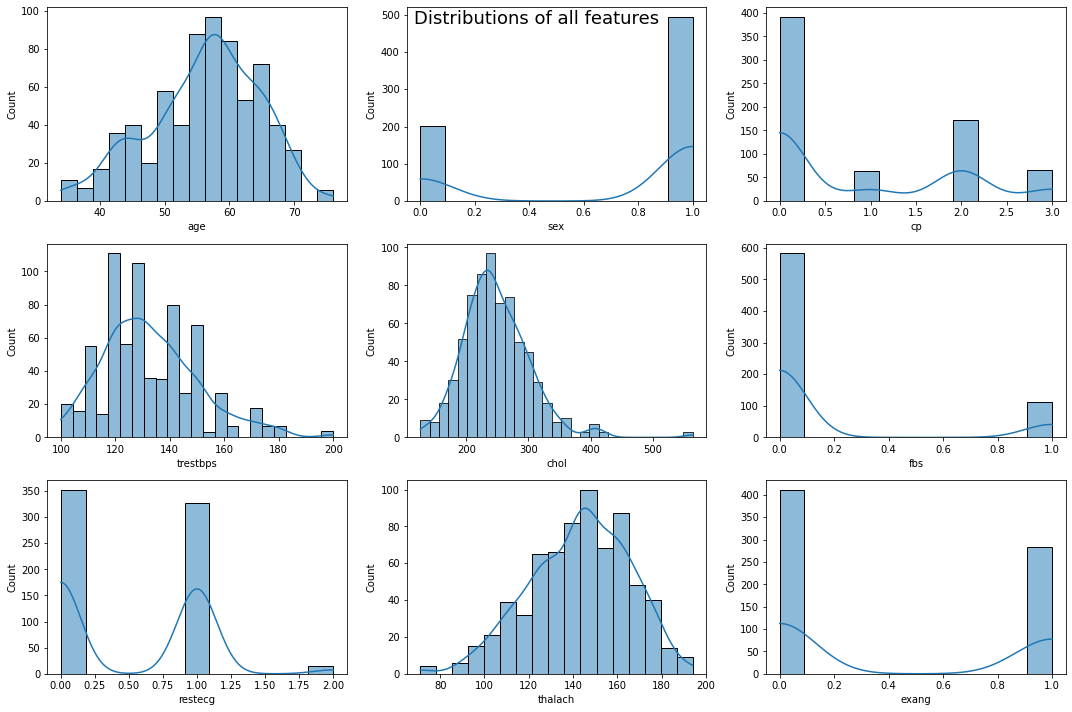

In [ ]:
#Understanding the distribution of all the features in the dataset:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,10))
for column, subplot in zip(heart_df, ax.flatten()):
    sns.histplot(x = heart_df[column], kde = True, ax = subplot)

fig.suptitle('Distributions of all features', fontsize = 18)
fig.tight_layout()
plt.show()

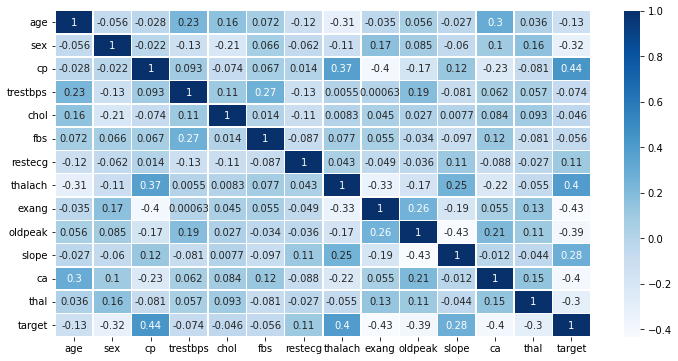

In [ ]:
#Plotting a correlation matrix:
corr = heart_df.corr()
fig, ax = plt.subplots(figsize = (12,6))
sns.heatmap(corr, annot = True, cmap = 'Blues', linewidths = 0.5, ax = ax)
plt.show()

In [ ]:
y = heart_df.target
x = heart_df.drop(['target'], axis = 1)
print(x.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
4   3     2  
5   0     2  


In [ ]:
#Scaling the independent features:
scaler = StandardScaler()
scaler.fit(x)
X = scaler.fit_transform(x)

In [ ]:
accuracy_scores = []
seeds = range(0,101)

for i in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    Logit_Model = LogisticRegression()
    Logit_Model.fit(X_train,y_train)
    Logit_Prediction = Logit_Model.predict(X_test)
    Logit_Score = accuracy_score(y_test,Logit_Prediction)
    accuracy_scores.append(Logit_Score)

In [ ]:
print(accuracy_scores)

[0.7785714285714286, 0.8571428571428571, 0.8142857142857143, 0.8571428571428571, 0.8571428571428571, 0.8785714285714286, 0.85, 0.8785714285714286, 0.8214285714285714, 0.85, 0.8642857142857143, 0.85, 0.8428571428571429, 0.8785714285714286, 0.8857142857142857, 0.8428571428571429, 0.8142857142857143, 0.8785714285714286, 0.8642857142857143, 0.85, 0.8214285714285714, 0.85, 0.8142857142857143, 0.85, 0.8428571428571429, 0.8214285714285714, 0.8357142857142857, 0.8357142857142857, 0.8428571428571429, 0.8928571428571429, 0.8714285714285714, 0.8714285714285714, 0.9142857142857143, 0.8785714285714286, 0.85, 0.8571428571428571, 0.9, 0.8571428571428571, 0.8428571428571429, 0.8428571428571429, 0.7928571428571428, 0.8785714285714286, 0.85, 0.8571428571428571, 0.8357142857142857, 0.85, 0.8857142857142857, 0.8071428571428572, 0.8785714285714286, 0.8285714285714286, 0.8785714285714286, 0.8214285714285714, 0.8357142857142857, 0.8428571428571429, 0.8285714285714286, 0.8285714285714286, 0.8642857142857143, 

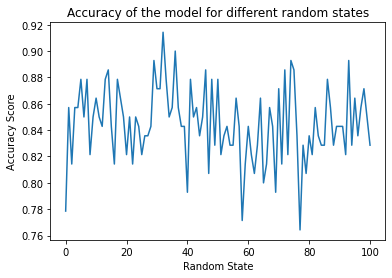

In [ ]:
#Plotting the accuracies of the model on different random states:
plt.plot(seeds, accuracy_scores)
plt.title("Accuracy of the model for different random states")
plt.ylabel('Accuracy Score')
plt.xlabel('Random State')
plt.show()

In [ ]:
#Finding the random state that offers the highest accuracy:
maxAccuracy = max(accuracy_scores)
maxAccState = accuracy_scores.index(maxAccuracy)
print("The highest accuracy is:", maxAccuracy)
print("The random state that offers the highest accuracy is:", maxAccState)

The highest accuracy is: 0.9142857142857143
The random state that offers the highest accuracy is: 32


In [ ]:
#Splitting the dataset into training and testing set based on the best random state found:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=maxAccState)

In [ ]:
#Fitting the data on the logistic regression model and making predictions:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)
Logit_Prediction = Logit_Model.predict(X_test)

In [ ]:
print(metrics.accuracy_score(Logit_Prediction, y_test) * 100)

91.42857142857143


In [ ]:
#Defining a function for plotting confusion matrix:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title("Confusion matrix for " + model_name, fontsize = 18)
    plt.show()

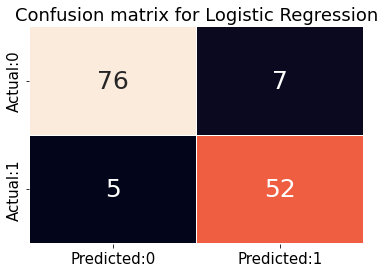

In [ ]:
#Plotting confusion matrix:
plot_confusion_matrix(y_test, Logit_Prediction, "Logistic Regression")

In [ ]:
#Generating accuracy score and classification report:

Logit_Score = accuracy_score(y_test,Logit_Prediction)
Logit_Report = classification_report(y_test,Logit_Prediction)

In [ ]:
#Printing the classification reports:
print("Logistic Regression Classification Report:\n\n", Logit_Report)

Logistic Regression Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.92      0.93        83
           1       0.88      0.91      0.90        57

    accuracy                           0.91       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.92      0.91      0.91       140



In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, Logit_Prediction))
print('MSE:', metrics.mean_squared_error(y_test, Logit_Prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Logit_Prediction)))

MAE: 0.08571428571428572
MSE: 0.08571428571428572
RMSE: 0.29277002188455997
